## SS.lv datu analīze kategorijai dzīvokļi

##### Atlasītie dati ir no ss.lv sludinājumiem par dzīvokļiem laika posmā no 18.11.2023 līdz 03.01.2024

### Datu apstrāde un analīze

#### Šeit ir kods, kas izveido failu m2_prices, kur ir attēlota katra vieta vienu reizi ar attiecīgo vidējo īres cenu par kvadrātmetru.

In [1]:
import pandas as pd

data = pd.read_excel('ss_flat_data.xlsx')

def extract_first_word(area):
    return area.split()[0] if isinstance(area, str) else None

# Izveidojam jaunu kolonnu ar šiem vārdiem
data['First Word'] = data['Area'].apply(extract_first_word)
data['First Word'] = data['First Word'].str.replace('Maskavas', 'Maskavas Priešpilsēta')

# Funkcija, kas izmanto datus tikai, kur ir skaitļi
def extract_numeric_price(price):
    try:
        return float(''.join(filter(str.isdigit, str(price))))
    except ValueError:
        return None

# Izveidojam jaunu kolonnu ar šiem skaitliskajiem datiem
data['Numeric Price'] = data['Price'].apply(extract_numeric_price)

# Funkcija, kas iegūst visas kvadrātmetru vērtības
def extract_numeric_m2(m2):
    try:
        return float(m2)
    except ValueError:
        return None

# Izveidojam jaunu kolonnu no iegūtajiem datiem
data['Numeric m2'] = data['m2'].apply(extract_numeric_m2)

# Izmanto tikai tās kolonnas, kurās ir vārds "mēn", lai izfiltrētu dzīvokļus, kurus izīrē
filtered_data = data[data['Price'].str.contains("mēn") &
                      (data['Numeric Price'].notna()) &
                      (data['Numeric m2'].notna())]

# Izvēlas tikai vienu rindu, katrai unikālajai vērtībai
unique_areas_data = filtered_data.groupby('Area').first().reset_index()

# Aprēķina vidējo cenu par kvadrātmetru
average_prices_per_m2 = (unique_areas_data.groupby('First Word')['Numeric Price'].mean() /
                         unique_areas_data.groupby('First Word')['Numeric m2'].mean()).reset_index()
average_prices_per_m2.columns = ['Area', 'Average Price per m2']

# Save the result to m2_price.xlsx
average_prices_per_m2.to_excel('m2_price.xlsx', index=False)


#### Šeit ir kods, kas izveido heatmap, kur tiek attēlota vidējā īres cena par kvadrātmetru katrā vietā.

In [3]:
import pandas as pd
import folium
from folium.plugins import HeatMap


data = pd.read_excel('ss_flat_data.xlsx')
location=pd.read_excel('coordinates.xlsx')
price=pd.read_excel('m2_price.xlsx')

#Sapludina abus failus kopā
merged_data = pd.merge(location, price, on='Area', how='inner')

# Aprēķina kartes vidu
map_center = merged_data[['Latitude', 'Longitude']].mean()

# Izveido karti
map_osm = folium.Map(location=[map_center['Latitude'], map_center['Longitude']], zoom_start=12)

# Pievieno datus kartē, kur attēlo vidējo cenu par kvadrātmetru
folium.plugins.HeatMap(merged_data[['Latitude', 'Longitude', 'Average Price per m2']].values,
                       min_opacity=0.3,
                       max_opacity=0.3,
                       radius=15,
                       blur=10,
                       max_zoom=13).add_to(map_osm)

#Karti saglabā html failā
#map_osm.save('heatmap_m2_price.html')

map_osm #show map in jupyter notebook

#### Šeit ir kods, kas atlasa sludinājumus, kuri pārdod dzīvokļus un aprēķina vidējo pārdošanas cenu par kvadrātmetru, un izveido failu ar šīm vērtībām.

In [4]:
import pandas as pd

data = pd.read_excel('ss_flat_data.xlsx')

def extract_first_word(area):
    return area.split()[0] if isinstance(area, str) else None

# Izveidojam jaunu kolonnu ar šiem vārdiem
data['First Word'] = data['Area'].apply(extract_first_word)
data['First Word'] = data['First Word'].str.replace('Maskavas', 'Maskavas Priešpilsēta')

# Funkcija, kas izmanto datus tikai, kur ir skaitļi
def extract_numeric_price(price):
    try:
        return float(''.join(filter(str.isdigit, str(price))))
    except ValueError:
        return None

# Izveidojam jaunu kolonnu ar šiem skaitliskajiem datiem
data['Numeric Price'] = data['Price'].apply(extract_numeric_price)

# Funkcija, kas iegūst visas kvadrātmetru vērtības
def extract_numeric_m2(m2):
    try:
        return float(m2)
    except ValueError:
        return None

# Izveidojam jaunu kolonnu no iegūtajiem datiem
data['Numeric m2'] = data['m2'].apply(extract_numeric_m2)

# Izmanto tikai tās kolonnas, kurās ir vārds "mēn", lai izfiltrētu dzīvokļus, kurus izīrē
filtered_data = data[~data['Price'].str.contains("mēn") &
                      (data['Numeric Price'].notna()) &
                      (data['Numeric m2'].notna())]

# Izvēlas tikai vienu rindu, katrai unikālajai vērtībai
unique_areas_data = filtered_data.groupby('Area').first().reset_index()

# Aprēķina vidējo cenu par kvadrātmetru
average_prices_per_m2 = (unique_areas_data.groupby('First Word')['Numeric Price'].mean() /
                         unique_areas_data.groupby('First Word')['Numeric m2'].mean()).reset_index()
average_prices_per_m2.columns = ['Area', 'Average sell Price per m2']

# Save the result to m2_price.xlsx
average_prices_per_m2.to_excel('m2_price_sell.xlsx', index=False)

#### Šeit ir kods, kas izveido heatmap, kur tiek attēlota vidējā pārdošanas cena uz kvadrātmetru katrā vietā.

In [5]:
import pandas as pd
import folium
from folium.plugins import HeatMap

data = pd.read_excel('ss_flat_data.xlsx')
location=pd.read_excel('coordinates.xlsx')
sell_price=pd.read_excel('m2_price_sell.xlsx')

#Sapludina abus failus kopā
merged_data = pd.merge(location, sell_price, on='Area', how='inner')

# Aprēķina kartes vidu
map_center = merged_data[['Latitude', 'Longitude']].mean()

# Izveido karti
map_osm = folium.Map(location=[map_center['Latitude'], map_center['Longitude']], zoom_start=12)

# Pievieno datus kartē, kur attēlo vidējo cenu par kvadrātmetru
folium.plugins.HeatMap(merged_data[['Latitude', 'Longitude', 'Average sell Price per m2']].values,
                       min_opacity=0.3,
                       max_opacity=0.3,
                       radius=15,
                       blur=10,
                       max_zoom=13).add_to(map_osm)

#Karti saglabā html failā
#map_osm.save('heatmap_m2_sell_price.html')

map_osm #show map in jupyter notebook

#### Šeit ir kods, kas izveido heatmap ar īres cenu dalītu ar pārdošanas cenu uz kvadrātmetru, jeb īres un pārdošanas cenu attiecību.

In [6]:
import pandas as pd
import folium
from folium.plugins import HeatMap

data = pd.read_excel('ss_flat_data.xlsx')
location=pd.read_excel('coordinates.xlsx')
price=pd.read_excel('m2_price.xlsx')
sell_price=pd.read_excel('m2_price_sell.xlsx')

#Sapludina abus failus kopā
merged_data = pd.merge(location, price, on='Area', how='inner')
merged_data = pd.merge(merged_data, sell_price, on='Area', how='inner')

# Aprēķina vidējo cenu par kvadrātmetru
merged_data['Price to Sell Price Ratio'] = merged_data['Average Price per m2'] / merged_data['Average sell Price per m2']

# Aprēķina kartes vidu
map_center = merged_data[['Latitude', 'Longitude']].mean()

# Izveido karti
map_osm = folium.Map(location=[map_center['Latitude'], map_center['Longitude']], zoom_start=12)

# Pievieno datus kartē, kur attēlo vidējo cenu par kvadrātmetru
folium.plugins.HeatMap(merged_data[['Latitude', 'Longitude', 'Price to Sell Price Ratio']].values,
                       min_opacity=0.3,
                       max_opacity=0.3,
                       radius=15,
                       blur=10,
                       max_zoom=13).add_to(map_osm)

#Karti saglabā html failā
#map_osm.save('heatmap_price_to_sell_price_ratio.html')

map_osm #show map in jupyter notebook

#### Šeit ir kods, kas izveido stabiņu diagrammu ar īres cenu par kvadrātmetru, atkarībā no mājas sērijas

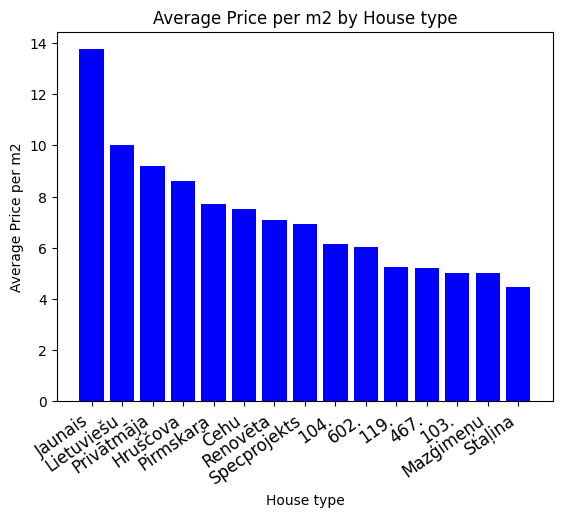

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel('ss_flat_data.xlsx')

# Aizvieto apzīmējumus ar pilniem vārdiem
data['House type'] = data['House type'].str.replace('Čehu pr.', 'Čehu')
data['House type'] = data['House type'].str.replace('Hrušč.', 'Hruščova')
data['House type'] = data['House type'].str.replace('LT proj.', 'Lietuviešu')
data['House type'] = data['House type'].str.replace('P. kara', 'Pirmskara')
data['House type'] = data['House type'].str.replace('M. ģim.', 'Mazģimeņu')
data['House type'] = data['House type'].str.replace('Specpr.', 'Specprojekts')
data['House type'] = data['House type'].str.replace('Jaun.', 'Jaunais')
data['House type'] = data['House type'].str.replace('Renov.', 'Renovēta')
data['House type'] = data['House type'].str.replace('Priv. m.', 'Privātmāja')

# Funkcija, kas izmanto datus tikai, kur ir skaitļi
def extract_numeric_price(price):
    try:
        return float(''.join(filter(str.isdigit, str(price))))
    except ValueError:
        return None

# Izveidojam jaunu kolonnu ar šiem skaitliskajiem datiem
data['Numeric Price'] = data['Price'].apply(extract_numeric_price)

# Funkcija, kas iegūst visas kvadrātmetru vērtības
def extract_numeric_m2(m2):
    try:
        return float(m2)
    except ValueError:
        return None
# Izveidojam jaunu kolonnu no iegūtajiem datiem
data['Numeric m2'] = data['m2'].apply(extract_numeric_m2)

# Izmanto tikai tās kolonnas, kurās ir vārds "mēn", lai izfiltrētu dzīvokļus, kurus izīrē
filtered_data = data[data['Price'].str.contains("mēn") &
                      (data['Numeric Price'].notna()) &
                      (data['Numeric m2'].notna())]
# Izvēlas tikai vienu rindu, katrai unikālajai vērtībai
unique_areas_data = filtered_data.groupby('House type').first().reset_index()

# Aprēķina vidējo cenu par kvadrātmetru
average_prices_per_m2 = (unique_areas_data.groupby('House type')['Numeric Price'].mean() /
                         unique_areas_data.groupby('House type')['Numeric m2'].mean()).reset_index()

# Sakārto datus dilstošā secībā
average_prices_per_m2 = average_prices_per_m2.sort_values(by=0, ascending=False)

# Izveido stabiņu diagrammu
plt.bar(average_prices_per_m2['House type'], average_prices_per_m2[0], color='blue')

plt.xlabel('House type')
plt.ylabel('Average Price per m2')
plt.title('Average Price per m2 by House type')
plt.xticks(rotation=35, ha='right', fontsize=12)

plt.show()
